In [75]:
import pandas as pd
import numpy as np
from agb import agb
from matplotlib import pyplot as plt

In [70]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data",header=None)
data = data.drop([0,1,2,3,4,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126],axis=1)
data.replace("?",np.NaN,inplace=True)
data.dropna(inplace=True)
data[30] = data[30].astype('float')
data = data.reset_index(drop=True)

In [71]:
x_train = data.drop([127],axis=1)
y_train = data[127]
y_train = y_train.astype('float')

In [73]:
agb_n_true       = agb(x_train,y_train,nesterov=True,n_trees=500,subsample=1)

rmse


In [74]:
agb_n_false      = agb(x_train,y_train,nesterov=False,n_trees=500,subsample=1)

rmse


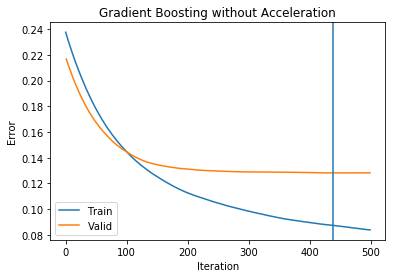

439
0.12819273483491112


In [98]:
plt.plot(agb_n_false['error_train'])
plt.plot(agb_n_false['error_valid'])
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.gca().legend(('Train','Valid'))
plt.axvline(x=np.nanargmin(agb_n_false['error_valid']))
plt.title('Gradient Boosting without Acceleration')
plt.show()
print(np.nanargmin(agb_n_false['error_valid']))
print(np.nanmin(agb_n_false['error_valid']))      

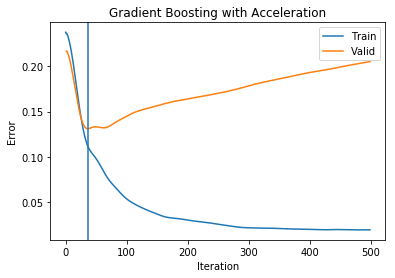

36
0.1310328910052382


In [99]:
plt.plot(agb_n_true['error_train'])
plt.plot(agb_n_true['error_valid'])
plt.axvline(x=np.nanargmin(agb_n_true['error_valid']))
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.gca().legend(('Train','Valid'))
plt.title('Gradient Boosting with Acceleration')
plt.show()
print(np.nanargmin(agb_n_true['error_valid']))
print(np.nanmin(agb_n_true['error_valid'])) 